In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [2]:
df = pd.read_csv("long_df.csv")

In [3]:
df = df.fillna(0)
df.columns
df["sez"] = np.where(df["ent"] > 0,1,0)


In [4]:
df["egdp"].isin([0]).any()

False

In [5]:
df["pop"].isin([0]).any()

False

In [6]:
print(df[['egdp', 'pop']].min())

egdp     0.270584
pop     26.553768
dtype: float64


In [7]:
offset = 1000000 
df["egdppc"] = (df["egdp"]/df["pop"]) + offset
mask = df['egdppc'] == 0 
df = df[~mask]
df["lnegdppc"] = np.log(df["egdppc"])

In [8]:
mask2 = df["ntl_"] == 0
df = df[~mask2] 
df["ntlpc"] = (df["ntl_"]/df["pop"]) + offset
df["lnntlpc"] = np.log(df["ntlpc"])

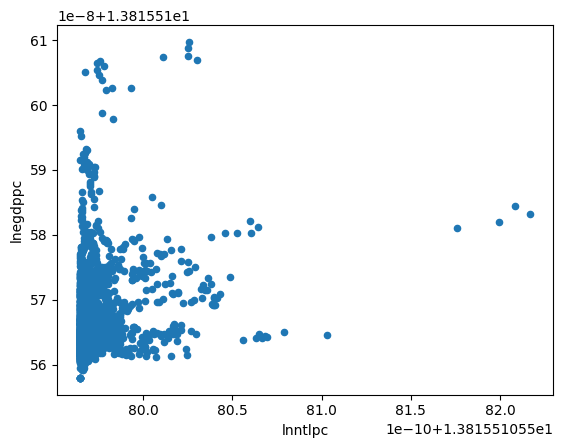

In [9]:
df.plot(x="lnntlpc", y="lnegdppc", kind="scatter");

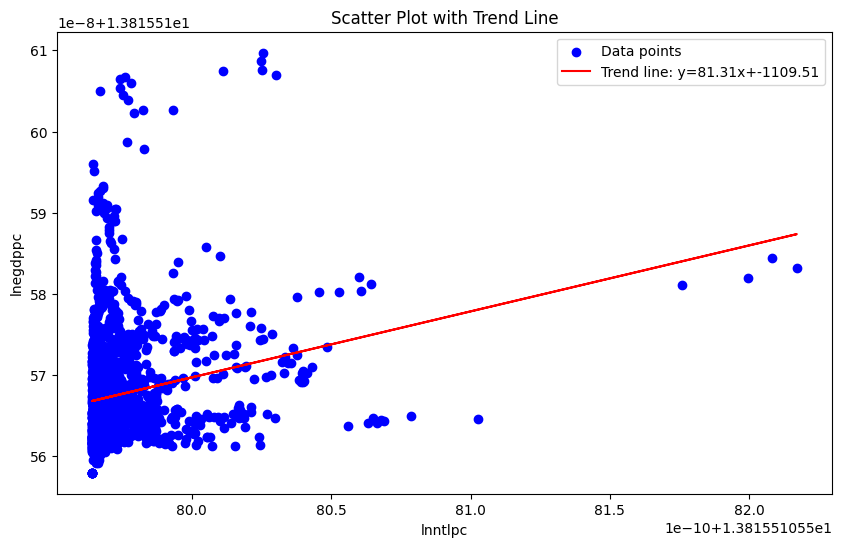

In [10]:
slope, intercept = np.polyfit(df['lnntlpc'], df['lnegdppc'], 1)
trend_line = slope * df['lnntlpc'] + intercept

# Step 2: Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['lnntlpc'], df['lnegdppc'], color='blue', label='Data points')

# Step 3: Add the regression line
plt.plot(df['lnntlpc'], trend_line, color='red', label=f'Trend line: y={slope:.2f}x+{intercept:.2f}')

# Enhance plot
plt.title('Scatter Plot with Trend Line')
plt.xlabel('lnntlpc')
plt.ylabel('lnegdppc')
plt.legend()

plt.show()

In [11]:
df['lnntlpc'].corr(df['lnegdppc'])

0.22208121447832124

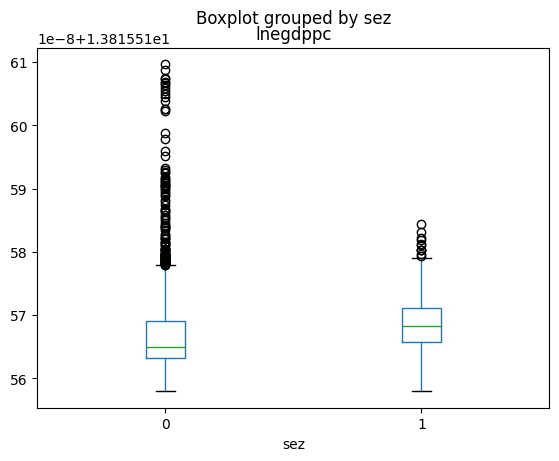

In [18]:
df['sez'] = np.where(df['ent'] > 1, 1, 0)

boxplot = df.boxplot(by='sez', column=['lnegdppc'], grid=False)

In [21]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

<Axes: title={'center': 'lnegdppc'}, xlabel='sez'>

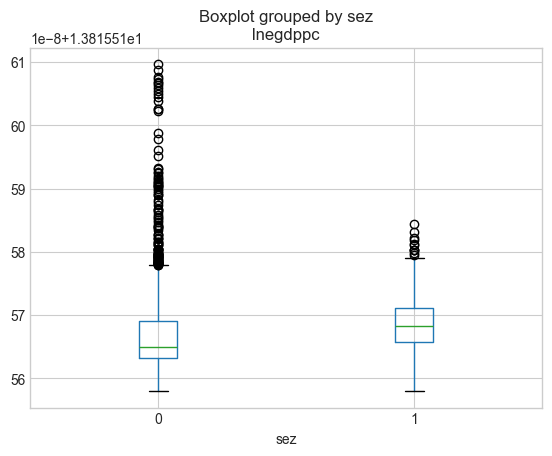

In [22]:
plt.style.use("seaborn-v0_8-whitegrid")
df.boxplot(by="sez", column="lnegdppc")

<Axes: title={'center': 'lnntlpc'}, xlabel='sez'>

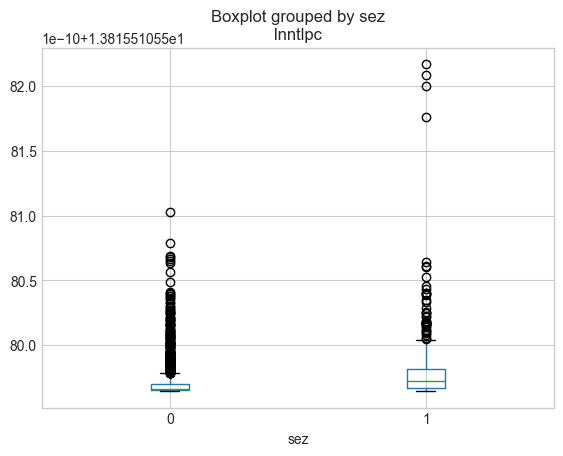

In [23]:
df.boxplot(by="sez", column="lnntlpc")

In [14]:
#df.to_csv("long_df_manipulated.csv")

In [17]:
list(df.columns)

['id',
 'year',
 'shapeName',
 'inv',
 'ob_f_',
 'tec_f_',
 'adm_f_',
 'ob_m_',
 'tec_m_',
 'adm_m_',
 'ent',
 'ele',
 'com',
 'inf',
 'wat',
 'tss',
 'buiilt',
 'ocu',
 'sal_op',
 'sal_tec',
 'pop',
 'prep',
 'temp',
 'agr_',
 'urb_',
 'ntl_',
 'egdp',
 'len',
 'sez',
 'egdppc',
 'lnegdppc',
 'ntlpc',
 'lnntlpc']

In [ ]:
fig = px.timeline(df, )